# Aprendizaje Automático: Trabajo práctico 1

**Maestría de Exploración de Datos y Descubrimiento del Conocimiento, UBA.** 

Profesores: Laura de la Fuente, Hernán Bocaccio

Ayudantes: Gastón Bujía, Diego Onna y Sofía Morena del Pozo

Fecha: Abril 2023


# Entrega

La fecha límite de entrega es el domingo **21 de Mayo inclusive**. El informe deberá ser publicado en el campus de la materia por sólo uno de los integrantes del grupo. **Extensión máxima del TP 5 carillas**. Deben entregarse un archivo ZIP que contenga el informe y el código necesario para replicar los resultados que figuran en el informe. El nombre debe tener el siguiente formato:

    TP_1_grupo_XX_APELLIDO1_APELLIDO2_APELLIDO3.zip

Donde los apellidos deben aparecer en minúscula con orden alfabético, si el apellido es compuesto separarlo con un `-`.

# Consignas

Properati disponibiliza información sobre avisos de inmuebles de toda Latinoamérica desde 2015. En este TP se analizará únicamente la información de los inmuebles de Capital Federal que se encuentran en venta. El objetivo es predecir el precio (`price` para regresión y `price_respuesta` para clasificación) de los mismos utilizando el conjunto de [datos subido al campus](https://drive.google.com/file/d/1fjLfX3y-uKqtjyW9G2VFXDzQ3fdAwrZd/view?usp=sharing).

El presente trabajo será grupal y deberá estar compuesto por 3 o 4 integrantes. Se podrán evaluar los contenidos del TP durante el parcial posterior a la entrega. Todos los integrantes deben tener conocimiento del desarrollo del trabajo.

Se deberá elaborar un informe siguiendo el formato detallado en [Formato_informes.docx](https://docs.google.com/document/d/1EolqWN72YOhOpD1PBm1dyAuT8oJTloQ3/edit?usp=sharing&ouid=111337782270548562685&rtpof=true&sd=true), disponible en el campus, y entregarlo en formato .pdf. La entrega deberá estar acompañada de la Jupyter Notebook en Python, utilizada para generar los resultados.

Para realizar el informe deberán responder y documentarse al menos **los siguientes puntos** (queda a su criterio como distribuir el contenido en cada grupo de secciones):

*En las secciones: Datos, Materiales y Métodos*

*   ¿Qué información (atributos) hay disponibles para hacer la predicción? 
*   Caracterizar cada variable (tipo de atributos -categóricos, numéricos, 
ordinales-, rangos de valores, etc. ¿Hay valores faltantes? 
*   Seleccionar el subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
*   Realizar una separación de datos en conjuntos de desarrollo y de evaluación.

*En las secciones: Resultados y Discusión*

*   Entrenar en los datos de desarrollo por validación cruzada buscando optimizar los hiperparámetros para clasificar el rango de precio los siguientes modelos:
    * **modelos de árboles**
    * modelos clásicos: **para clasificacion usar al menos 2 modelos entre KNN, SVM, NB y para regresión usar al menos 2 modelos entre KNN, SVM, RL**

    Usar random search y 5-fold cross-validation sobre el conjunto de desarrollo para explorar muchas combinaciones posibles de valores. Elija la métrica a optimizar. Justifique. Ej.: para los hiperparámetros principales del DecisionTreeClassifier probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).
*   Evaluar y reportar las métricas de clasificación que crean relevantes tanto en el conjunto de desarrollo como el de evaluación. Justifique las métricas seleccionadas.
*   Comparar el desempeño obtenido con modelos clásicos y basados en árboles. Cuáles seleccionaría?
*   Graficar resultados obtenidos. Graficar el mejor árbol.
*   Para cada modelo declarar ¿Cuál variable considera que fue más importante para la decisión? Responder esta pregunta a partir de gráficos y mediante el cálculo de importancia de atributos.

*Conclusión*
*   A partir de los resultados obtenidos ¿Qué recomendación/es les daría a aquellas personas que pretendan comprar una propiedad en CABA? ¿Considera que haría falta incluir alguna variable relevante en la clasificación?


# Implementación del TP

In [1]:
### Importamos bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import re
import random
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
import sklearn.linear_model as linear_model
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import plot_tree

from sklearn import model_selection
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report,r2_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.exceptions import DataConversionWarning
import xgboost as xgb


import warnings

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


## Importación del dataset

In [2]:
# Importamos el dataset

pd.set_option("display.max_columns", None)
datos = pd.read_csv("https://drive.google.com/uc?id=1fjLfX3y-uKqtjyW9G2VFXDzQ3fdAwrZd",encoding='latin-1')

datos.head()

,Unnamed: 0,rooms,bathrooms,surface_total,price,property_type,terraza_patio_balcon,l3,comunas,price_respuesta
0,2,2.0,3.0,265.0,600000.0,Oficina,True,Recoleta,comuna_2,alto
1,3,5.0,3.0,150.0,195000.0,Oficina,False,Monserrat,comuna_1,medio
2,8,2.0,1.0,80.0,155000.0,Oficina,False,San NicolÃ¡s,comuna_1,medio
3,9,2.0,2.0,160.0,310000.0,Oficina,False,San NicolÃ¡s,comuna_1,alto
4,11,1.0,1.0,38.0,110000.0,Departamento,False,Almagro,comuna_5,bajo


## Materiales y métodos

***Aquí vamos a contestar la pregunta ¿Cómo se estudió el problema?***

Explicamos que datos usamos, como fueron tomados y cómo los vamos a analizar. En general vamos a tener esas 3 subsecciones.

**Muestra / datos / variables explicativas o experiencia E**

Agregamos los datos de los que disponemos sobre la conformación de nuestra/s muestra/s con su descripción. Fuente, número de muestras, características, criterios de calidad, y otras fuentes conocidas que puedan sesgar nuestros datos, etcétera.

**Variable respuesta/tarea objetivo T**

Aquí se explica cómo se adquirieron los datos y generaron las etiquetas. Si sabemos como se tomó una medida, se explica.

**Análisis estadístico / modelos**

Aquí explicitamos cómo vamos a analizar los datos. Empezamos por decir que trabajamos con Python. Explicamos qué comparaciones o asociaciones vamos a analizar y que pruebas usaremos para eso. Se especifican también los criterios con los que vamos a considerar cada análisis significativo. Por ejemplo: Analizamos las diferencias de medias entre X e Y con un T-test, reportamos como significativo con un p < 0.05. Para reportar modelos, especificamos para cada uno los parámetros seleccionados como especificaremos en clase modelo a modelo. 

**Incluyan gráficos y algo de exploración de datos**

Hay datos faltantes? 
Están balanceados? 
Cómo se ven, según la clase, las diferentes variables?

## Análisis Exploratorio de Datos

### 1. Revisión general del dataset

In [3]:
print('Dimensiones del dataset:', datos.shape[0], ' filas y ', datos.shape[1], ' columnas')

Dimensiones del dataset: 142300  filas y  10  columnas


In [4]:
# Información general de los atributos
datos= datos.drop(columns="Unnamed: 0")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142300 entries, 0 to 142299
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rooms                 142300 non-null  float64
 1   bathrooms             142300 non-null  float64
 2   surface_total         142300 non-null  float64
 3   price                 142300 non-null  float64
 4   property_type         142300 non-null  object 
 5   terraza_patio_balcon  142300 non-null  bool   
 6   l3                    142300 non-null  object 
 7   comunas               142300 non-null  object 
 8   price_respuesta       142300 non-null  object 
dtypes: bool(1), float64(4), object(4)
memory usage: 8.8+ MB


In [5]:
#Eliminamos duplicados 
datos = datos.drop_duplicates()
datos.shape

(100381, 9)

In [6]:
# Datos faltantes por atributo
datos.isna().sum()

rooms                   0
bathrooms               0
surface_total           0
price                   0
property_type           0
terraza_patio_balcon    0
l3                      0
comunas                 0
price_respuesta         0
dtype: int64

In [7]:
# Estadísticos descriptivos
datos.describe(include = 'all')

,rooms,bathrooms,surface_total,price,property_type,terraza_patio_balcon,l3,comunas,price_respuesta
count,100381.000000,100381.000000,100381.000000,1.003810e+05,100381,100381,100381,100381,100381
unique,NaN,NaN,NaN,NaN,6,2,57,15,3
top,NaN,NaN,NaN,NaN,Departamento,True,Palermo,comuna_13,bajo
freq,NaN,NaN,NaN,NaN,78818,50431,11493,13884,37127
mean,2.564220,1.483787,96.552405,2.051471e+05,NaN,NaN,NaN,NaN,NaN
std,1.124016,0.732332,138.713585,2.634968e+05,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,11.000000,1.550000e+04,NaN,NaN,NaN,NaN,NaN
25%,2.000000,1.000000,50.000000,9.900000e+04,NaN,NaN,NaN,NaN,NaN
50%,2.000000,1.000000,68.000000,1.484000e+05,NaN,NaN,NaN,NaN,NaN
75%,3.000000,2.000000,117.666200,2.350000e+05,NaN,NaN,NaN,NaN,NaN


Observaciones:

* Variables categóricas:

  - **property_type** : variable categórica nominal. Hace referencia al tipo de propiedad.
  - **terraza_patio_balcon**: variable categórica binaria. Indica si la propiedad posee o no alguno de amenities/adicionales. 
  - **l3**: variable categórica nominal. Indica el barrio al cual pertenece la propiedad. 
  - **comunas**: variable categórica nominal. Indica la comuna a la cual pertenece la propiedad.
  - **price_respuesta**: variable categórica ordinal. Indica a qué categoría de precio (rango de precio) está siendo vendida la propiedad. 

* Variables numéricas:
 - **rooms**: variable numérica discreta. Indica la cantidad de habitaciones de la propiedad.
 - **bathrrooms**: variable numérica discreta. Indica la cantidad de baños.
 - **surface_total**: variable numérica contínua. Refiere a la cantidad de metros cuadrados de la propiedad.
 - **price**: variable numérica contínua. Indica el precio de la propiedad.



# Tranformación de variables

En base a las observaciones anteriores, realizaremos algunas transformaciones en las variables:

In [8]:
datos['price_respuesta'] = datos['price_respuesta'].map({'bajo': 0, 'medio': 1, 'alto': 3})

# Renombremos variable l3
datos.rename(columns = {'l3':'barrio'}, inplace = True)

# Agrupemos en una misma categoría las casas y casa de campo, ya que sólo existen 3 casas de campo 
datos['property_type'] = datos['property_type'].apply(lambda x: 'Casa' if x == 'Casa de campo' else x)

# Le sacamos la palabra 'comuna' para que despues quede mejor el one hot encoder
datos['comunas'] = datos['comunas'].str.extract(r'.*_(\d+)', expand=False) 


In [9]:
datos.head()

,rooms,bathrooms,surface_total,price,property_type,terraza_patio_balcon,barrio,comunas,price_respuesta
0,2.0,3.0,265.0,600000.0,Oficina,True,Recoleta,2,3
1,5.0,3.0,150.0,195000.0,Oficina,False,Monserrat,1,1
2,2.0,1.0,80.0,155000.0,Oficina,False,San NicolÃ¡s,1,1
3,2.0,2.0,160.0,310000.0,Oficina,False,San NicolÃ¡s,1,3
4,1.0,1.0,38.0,110000.0,Departamento,False,Almagro,5,0


Agregaremos un par de variables relacionadas a la cantidad de baños y habitaciones respecto a la superficie total de la propiedad: 

In [10]:
datos['bathrooms_per_m2'] = datos['bathrooms']/datos['surface_total']
datos['rooms_per_m2'] = datos['rooms']/datos['surface_total']

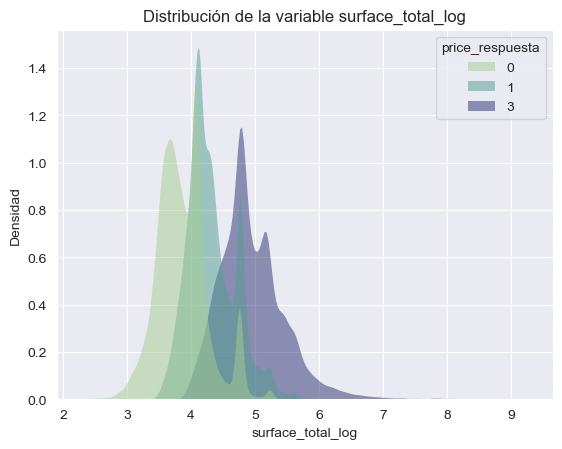

In [11]:
# Apliquemos una transaformación a la variable surface y observemos cómo varía su distribución
# Aplicamos el logaritmo
datos['surface_total_log'] = np.log(datos['surface_total'])
datos.drop(columns= ['surface_total'], inplace=True)

sns.kdeplot(data = datos, x = datos['surface_total_log'], hue='price_respuesta',
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)
plt.ylabel('Densidad')
plt.title('Distribución de la variable surface_total_log')
plt.show()

Observamos que la distribución de la variable surface_total se torna menos asimétrica. 

Encoding de variables categóricas utilizando get_dummies:

In [49]:
q3, q1 = np.percentile(datos["price"], [75,25])
iqr = q3-q1

inf_limit = q1-1.5*iqr
sup_limit = q3+1.5*iqr
data_wo_outliers = datos[(datos.price > inf_limit) & (datos.price < sup_limit)]




<AxesSubplot:ylabel='Frequency'>

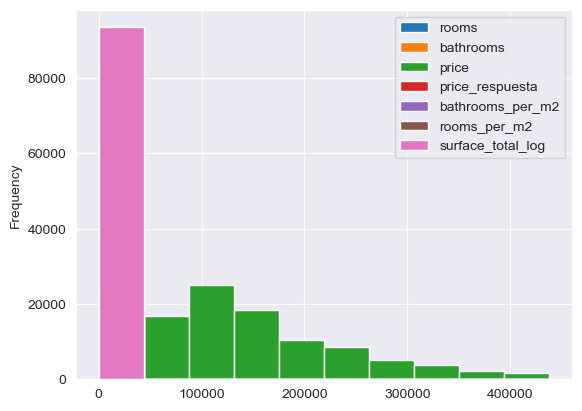

In [51]:
data_wo_outliers.plot(kind="hist")

In [52]:
datos = data_wo_outliers.copy()

In [53]:
# Transformación de variables categórica usando get_dummies

# Separamos las variables target, usamos _cat para el target de clasificación y _num para el target de regresion
y_cat = datos["price_respuesta"]
y_num = datos["price"]

# Realizamos el encoding de los atributos
X = datos.drop(columns=["price", "price_respuesta"])
X = pd.get_dummies(X)
X["terraza_patio_balcon"] = X["terraza_patio_balcon"].astype(int)
X.head()

,rooms,bathrooms,terraza_patio_balcon,bathrooms_per_m2,rooms_per_m2,surface_total_log,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Oficina,property_type_PH,barrio_Abasto,barrio_AgronomÃ­a,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,barrio_Catalinas,barrio_Centro / Microcentro,barrio_Chacarita,barrio_Coghlan,barrio_Colegiales,barrio_Congreso,barrio_ConstituciÃ³n,barrio_Flores,barrio_Floresta,barrio_Las CaÃ±itas,barrio_Liniers,barrio_Mataderos,barrio_Monserrat,barrio_Monte Castro,barrio_NuÃ±ez,barrio_Once,barrio_Palermo,barrio_Parque Avellaneda,barrio_Parque Centenario,barrio_Parque Chacabuco,barrio_Parque Chas,barrio_Parque Patricios,barrio_Paternal,barrio_Pompeya,barrio_Puerto Madero,barrio_Recoleta,barrio_Retiro,barrio_Saavedra,barrio_San Cristobal,barrio_San NicolÃ¡s,barrio_San Telmo,barrio_Tribunales,barrio_Velez Sarsfield,barrio_Versalles,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa PueyrredÃ³n,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque,comunas_1,comunas_10,comunas_11,comunas_12,comunas_13,comunas_14,comunas_15,comunas_2,comunas_3,comunas_4,comunas_5,comunas_6,comunas_7,comunas_8,comunas_9
1,5.0,3.0,0,0.020000,0.033333,5.010635,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,0,0.012500,0.025000,4.382027,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,0,0.012500,0.012500,5.075174,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,0,0.026316,0.026316,3.637586,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,1.0,1.0,0,0.028571,0.028571,3.555348,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Armamos un correlograma con las variables codificadas para evaluar si existen features que puedan ser descartados por alta correlatividad.


In [54]:
corr = X.corr().style.applymap(lambda x: 'background-color : yellow' if abs(x)>.8 else '')
display(corr)

,rooms,bathrooms,terraza_patio_balcon,bathrooms_per_m2,rooms_per_m2,surface_total_log,property_type_Casa,property_type_Departamento,property_type_Local comercial,property_type_Oficina,property_type_PH,barrio_Abasto,barrio_AgronomÃ­a,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,barrio_Catalinas,barrio_Centro / Microcentro,barrio_Chacarita,barrio_Coghlan,barrio_Colegiales,barrio_Congreso,barrio_ConstituciÃ³n,barrio_Flores,barrio_Floresta,barrio_Las CaÃ±itas,barrio_Liniers,barrio_Mataderos,barrio_Monserrat,barrio_Monte Castro,barrio_NuÃ±ez,barrio_Once,barrio_Palermo,barrio_Parque Avellaneda,barrio_Parque Centenario,barrio_Parque Chacabuco,barrio_Parque Chas,barrio_Parque Patricios,barrio_Paternal,barrio_Pompeya,barrio_Puerto Madero,barrio_Recoleta,barrio_Retiro,barrio_Saavedra,barrio_San Cristobal,barrio_San NicolÃ¡s,barrio_San Telmo,barrio_Tribunales,barrio_Velez Sarsfield,barrio_Versalles,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa PueyrredÃ³n,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque,comunas_1,comunas_10,comunas_11,comunas_12,comunas_13,comunas_14,comunas_15,comunas_2,comunas_3,comunas_4,comunas_5,comunas_6,comunas_7,comunas_8,comunas_9
rooms,1.000000,0.446747,0.128894,-0.389707,0.227970,0.650194,0.212872,-0.165378,-0.205081,-0.062002,0.222563,-0.009846,-0.000995,-0.020016,-0.008149,0.016786,0.024431,0.018979,-0.000691,-0.003044,0.027502,-0.003238,-0.021490,-0.015036,-0.014993,-0.011572,-0.010776,-0.018527,0.043308,0.012399,-0.002634,0.021188,0.036127,-0.028841,0.007120,-0.013830,0.004399,-0.056200,0.030434,0.005439,0.016667,-0.008110,0.010126,-0.000281,0.022889,-0.019670,0.033930,-0.017356,-0.000383,-0.023634,-0.040018,-0.042770,-0.012604,0.011974,0.014245,-0.016608,0.026297,0.008672,0.049846,0.011217,-0.006594,0.003781,0.026530,0.014587,0.008133,0.024430,-0.025507,0.017677,-0.077858,0.029944,0.033860,-0.022940,0.002900,-0.055926,-0.022539,0.042673,-0.023442,0.024361,-0.018963,0.028108,0.046058,0.056762,0.049488
bathrooms,0.446747,1.000000,0.082989,0.076535,-0.314700,0.636052,0.226801,-0.180567,-0.026550,0.070737,0.062019,0.004781,-0.002052,-0.028945,-0.020544,0.006433,0.008636,0.028157,-0.018809,-0.013387,0.020320,0.002796,0.011633,-0.018706,-0.000979,-0.007590,-0.010016,-0.018807,0.013400,-0.009142,0.016712,0.045865,0.043941,-0.005183,-0.004596,-0.010329,0.009073,-0.030525,0.010794,0.004489,-0.000968,-0.005592,-0.013116,-0.010221,-0.002807,0.006064,0.024704,0.003844,-0.005550,-0.027657,0.004214,-0.034111,0.002468,0.003729,0.006155,-0.011086,0.021354,-0.004804,0.036811,0.016758,-0.005404,-0.007211,0.014989,0.004277,0.000527,0.001238,-0.009208,0.002816,-0.015408,0.007816,0.014450,-0.012721,0.013712,-0.026999,-0.022186,0.025340,-0.028748,-0.010495,-0.032105,0.020857,0.010996,0.035583,0.063504
terraza_patio_balcon,0.128894,0.082989,1.000000,-0.181497,-0.148971,0.209135,0.128818,-0.155424,-0.110646,-0.102726,0.239737,-0.013158,0.019430,-0.004400,-0.043383,0.014001,-0.055674,-0.025262,-0.009242,0.006105,0.017765,-0.007151,-0.046332,0.004377,0.024278,-0.004861,-0.030355,-0.010420,0.020479,0.025046,-0.016384,0.022120,0.052998,-0.039240,0.027125,0.015142,-0.028499,-0.010255,0.026611,0.010846,0.035337,0.013892,0.003264,0.015161,0.026672,-0.006998,-0.068552,-0.061761,0.042648,-0.010141,-0.081789,-0.015163,-0.041280,0.017322,0.020841,0.006958,0.048107,0.021462,-0.005845,0.025243,0.027801,0.030831,0.018196,0.007879,0.018930,0.000653,0.053766,0.030515,-0.117661,0.054498,0.063955,0.081308,-0.014279,-0.013165,0.028105,-0.090171,-0.058427,0.016815,-0.000639,0.019541,0.036371,-0.003899,0.059808
bathrooms_per_m2,-0.389707,0.076535,-0.181497,1.000000,0.383469,-0.643575,-0.164129,0.172652,-0.001464,0.109702,-0.185185,0.017854,-0.003197,0.019281,0.026323,-0.031441,0.012366,0.009988,-0.

Salvo algunas pocas asociaciones entre barrios y comunas no se observan importantes asociaciones entre variables por lo que en principio ninguna será descartada.

## Separacion en Train y Test

Para el entrenamiento de modelos, separaremos el conjunto de datos en entrenamiento y testeo, quedandonos con un 80% de los datos queda en train y el restante para test. (`test_size=0.2`)

In [55]:
# Clasificación: En este caso utilización el parámetro stratify para que nos divida en conjuntos estratificados por la variable categórica target.
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X,y_cat,test_size=0.2, random_state = 42,stratify = y_cat)

In [56]:
# Regresión 
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X,y_num,test_size=0.2, random_state = 42)                                                

## Normalización de los atributos

Para normalizar los atributos, usaremos MinMaxScaler.

In [57]:
# Normalicemos los atributos
scaler = MinMaxScaler()
X_train_cat =  pd.DataFrame(scaler.fit_transform(X_train_cat), columns = X_train_cat.columns)
X_train_num =  pd.DataFrame(scaler.fit_transform(X_train_num), columns = X_train_num.columns)

# Para el conjunto de testeo sólo transformamos
X_test_cat =  pd.DataFrame(scaler.transform(X_test_cat), columns = X_test_cat.columns)
X_test_num =  pd.DataFrame(scaler.transform(X_test_num), columns = X_test_num.columns)

# Modelos de clasificación


## Modelo benchmark

Evaluamos como modelos base una diversidad de modelos:


* Regresión Logística
* Vecinos Mas cercanos (KNN)

* Navie Bayes
* Arboles de decisión
* Support Vector Machine

Ensambles:
* Random Forest
* Adaptative Boosting (AdaBoost)
* Gradient Boosting

De esta manera tendremos un Benchmark para seleccionar con qué modelos trabajar y optimizar sus hiperparámetros.


**Selección de Métricas**: Para medir el rendimiento del problema se tomará como referencia el accuracy ya que las clases están bastantes balanceadas y la matríz de confusión para observar qué tan bien o mal clasifica cada clase.

Ahora, probemos diferentes modelos de clasificación con sus parámetros por defecto y tomaremos los 4 modelos que mejor rendimiento presenten para realizar la optimización de los mismos. (2 de estos 4 será un modelo basado en arboles)


# Modelos de regresión



## Benchmarks regresión | hiperparámetros por defecto

Un modo de evaluar si un modelo de regresión es bueno prediciendo es evaluar si su performance es mejor que un modelo de regresión lineal basado en la mediana  de los datos de entrenamiento como unico beta para todos los atributos

En principio un modelo tan sencillo no sirve de nada. vamos entonces a hacer un benchamark más alto con con modelos sin hacer fine tuning de hiperparámetros

In [19]:
lista= []

In [58]:
from sklearn.dummy import DummyRegressor

models={
    'Dummy': DummyRegressor(strategy="median"),
    "RL": LinearRegression(),
    # "SVM": SVR(), # tarda demasiado
    "KNN": KNeighborsRegressor()
}

for model in models.items():
  start_time =  time.time()
  M = model[1]
  M.fit(X_train_num,y_train_num)
  end_time = time.time()
  lista.append(
      {'modelo': model[0],
       'dataset': "completo_s_out",
       'tipo': 'clasicos_s_out',
       'procesamiento': "benchmark",
       'params': M.get_params(),
       'r2_train': M.score(X_train_num, y_train_num),
       'r2_test':  M.score(X_test_num, y_test_num),
       'tiempo': round((end_time - start_time),2)
       }
       )

In [59]:
models ={"DT": DecisionTreeRegressor(),
         }

for model in models.items():
    M = model[1]
    M.fit(X_train_num,y_train_num)

    lista.append({'modelo': model[0],
                  'dataset': "completo_s_out",
                  'tipo': 'arboles',
                  'procesamiento': "benchmark",
                  'params': M.get_params(),
                  'r2_train': M.score(X_train_num, y_train_num),
                  'r2_test':  M.score(X_test_num, y_test_num)
                  }
                 )

In [60]:
models ={"RF": RandomForestRegressor(),
         'GB': GradientBoostingRegressor(),
         'XGB': xgb.XGBRegressor()
         }

for model in models.items():
    M = model[1]
    M.fit(X_train_num,y_train_num)

    lista.append({'modelo': model[0],
                  'dataset': "completo_s_out",
                  'tipo': 'ensambles',
                  'procesamiento': "benchmark",
                  'params': M.get_params(),
                  'r2_train': M.score(X_train_num, y_train_num),
                  'r2_test':  M.score(X_test_num, y_test_num)
                  }
                 )

## Optimización de Modelos

### Reducción dimensional: barrios o comunas
Los dummies generados por one-hot de
- barrio
- comuna
resultan redundantes y excesivos para la regresión.  

Se eliminan los primeros y se ensaya el rendimiento de los modelos anteriores.


In [61]:
lista_barrios = list(X_train_num.filter(like='barrio'))
X_train_s_barrios = X_train_num[ X_train_num.columns.drop(lista_barrios ) ]
X_test_s_barrios = X_test_num[ X_test_num.columns.drop(lista_barrios ) ]
# X_train_regresión.keys()

Comparamos primero los métodos clásicos.

In [62]:
models={
    'Dummy': DummyRegressor(strategy="median"),
    "RL": LinearRegression(),
    }

for model in models.items():
  start_time =  time.time()
  M = model[1]
  M.fit(X_train_s_barrios, y_train_num)
  end_time = time.time()
  lista.append(
      {'modelo': model[0],
       'dataset': "sin_barrio_s_out",
       'tipo': 'clasicos',
       'procesamiento': "benchmark",
       'params': M.get_params(),
       'r2_train': M.score(X_train_s_barrios, y_train_num),
       'r2_test':  M.score(X_test_s_barrios, y_test_num),
       'tiempo': round((end_time - start_time),2)
       }
       )

In [25]:
benchmark = pd.DataFrame(lista)
benchmark['gap>0.05'] = np.where(benchmark.r2_train-benchmark.r2_test>0.05, 'Sobreajustado', '')
benchmark.sort_values('r2_test', ascending=False)

,modelo,dataset,tipo,procesamiento,params,r2_train,r2_test,tiempo,gap>0.05
6,XGB,completo,ensambles,benchmark,"{'objective': 'reg:squarederror', 'base_score'...",0.853208,0.602901,NaN,Sobreajustado
4,RF,completo,ensambles,benchmark,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.871533,0.592569,NaN,Sobreajustado
5,GB,completo,ensambles,benchmark,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.713483,0.590772,NaN,Sobreajustado
1,RL,completo,clasicos,benchmark,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.440271,0.461148,0.52,
2,KNN,completo,clasicos,benchmark,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.641412,0.453393,0.01,Sobreajustado
3,DT,completo,arboles,benchmark,"{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_de...",0.904336,0.440325,NaN,Sobreajustado
8,RL,sin_barrio,clasicos,benchmark,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.424817,0.439272,0.07,
0,Dummy,completo,clasicos,benchmark,"{'constant': None, 'quantile': None, 'strategy...",-0.044857,-0.047796,0.00,
7,Dummy,sin_barrio,clasicos,benchmark,"{'constant': None, 'quantile': None, 'strategy...",-0.044857,-0.047796,0.00,


**Conclusión**: Quitar los barrios no logró un mejor R^2 en los modelos de mejor desempeño. Solo algunos como KNN mejoraron, pero se opta por optimizar los primeros.

### Regularización de regresión lineal

La elección del $\alpha$ se automatiza con un mecánismo de cross-validation que ensaya distintas particiones del conjunto de entrenamiento entre uno que se utiliza para este fin y uno independendiente llamado de validación. Se prueba el rendimiento del modelo con este parámetro realizando un número (**fold**) de distintas particiones. Como producto final se obtiene un modelo con el mejor parámetro hallado.

Para el método de regresión multi-lineal el único parámetro es el $\alpha$ de regularización por algunos de los métodos:
- Ridge $L^2$
- Lasso $|L|$
- EllasticNet: una combinación de los anteriores

Busco copiar lo que figura en (clase_5_modelos_de_regresion.ipynb).


In [63]:
%time
alphas_lasso = np.linspace(0.001, 10, 30)
folds = 5
modelCV = linear_model.LassoCV(alphas= alphas_lasso, cv= folds, max_iter=5000, random_state=123)
modelCV.fit(X_train_num, y_train_num)
modelCV.score(X_test_num, y_test_num), modelCV.alpha_


lista.append(
      {'modelo': "Lasso",
       'dataset': "completo_s_out",
       'tipo': 'clasicos',
       'procesamiento': "optimización",
       'params': modelCV.alpha_,
       'r2_train': modelCV.score(X_train_num, y_train_num),
       'r2_test':  modelCV.score(X_test_num, y_test_num),
       'tiempo': round((end_time - start_time),2)
       }
       )

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1357905386125.375, tolerance: 44514846325.90515
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270979341264.92188, tolerance: 44467024650.74448
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275813962884.46875, tolerance: 44648167420.58157
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

In [27]:
import copy
# lo conservo para
lasso_optimizadoCV= copy.deepcopy(modelCV)

El $R²$ es similar, el $\alpha$ hallado también, pero el tiempo de ejecución mucho menor con este último.  
Según la diferencia `GridSearchCV`+ método lineal produce lo mismo cualquier de estos métodos lineales con el CV incorporado.
https://stackoverflow.com/questions/66978038/should-i-use-lassocv-or-gridsearchcv-to-find-an-optimal-alpha-for-lasso

Ahora RidgeCV

In [64]:
%time
alphas_ridge= np.linspace(1.2, 1.5, 20)
folds = 5
modelCV = linear_model.RidgeCV(alphas= alphas_ridge, cv= folds)
modelCV.fit(X_train_num, y_train_num)
modelCV.score(X_test_num, y_test_num), modelCV.alpha_

lista.append(
      {'modelo': "Ridge",
       'dataset': "completo_s_out",
       'tipo': 'clasicos',
       'procesamiento': "optimización",
       'params': modelCV.alpha_,
       'r2_train': modelCV.score(X_train_num, y_train_num),
       'r2_test':  modelCV.score(X_test_num, y_test_num),
       'tiempo': round((end_time - start_time),2)
       }
       )


CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
ridge_optimizadoCV= copy.deepcopy(modelCV)

Finalmente para EllasticNet

In [65]:
%time
l1_ratios= np.logspace(-.5, -1E-5, 10)
# l1_ratios= np.linspace(0.3, .3, 10)
alphas= np.logspace(0, 1, 50)
folds = 5
modelCV = linear_model.ElasticNetCV(l1_ratio= l1_ratios, alphas= alphas, cv= folds, max_iter= 2000)
# modelCV = linear_model.ElasticNetCV(l1_ratio= l1_ratios, n_alphas= 50, cv= folds, max_iter= 2000)
modelCV.fit(X_train_num, y_train_num)
modelCV.score(X_test_num, y_test_num), modelCV.alpha_, modelCV.l1_ratio_

lista.append(
      {'modelo': "ElasticNet",
       'dataset': "completo_s_out",
       'tipo': 'clasicos',
       'procesamiento': "optimización",
       'params': modelCV.alpha_,
       'r2_train': modelCV.score(X_train_num, y_train_num),
       'r2_test':  modelCV.score(X_test_num, y_test_num),
       'tiempo': round((end_time - start_time),2)
       }
       )

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\igalk\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301038810084.4062, tolerance: 55686035782.372665
  model = cd_fast.enet_coordinate_descent(


Con l1_ratios= np.linspace(0.01, 1, 25)
y modelCV = linear_model.ElasticNetCV(l1_ratio= l1_ratios, n_alphas= 50, cv= folds, max_iter= 2000)

arrojó  
modelCV.score(X_test_num, y_test_num), modelCV.alpha_, modelCV.l1_ratio_  
(0.5142118020839171, 438789.07720905944, 1.0)  
no está aprovechando un balance quedandose con un solo peso.

Forzaré un l1 intermedio  
l1_ratios= np.linspace(0.01, .65, 25)  
(0.282869012449417, 108000.08172935546, 0.65)  
miserable


## Optimización de árboles

In [66]:
lista_barrios = list(X_train_num.filter(like='barrio'))
lista_comunas = list(X_train_num.filter(like='comuna'))

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



In [67]:
def optim_DT(dataset, X_train_num, y_train_num, X_test_num, y_test_num):

    model = DecisionTreeRegressor()

    params = {#"criterion": ["mse", "mae"],
              #"splitter": ["random"],
              "max_depth": [1,5],
              "min_samples_split": [2,5],
              "min_samples_leaf": [1,5]
              }

    model_cv= RandomizedSearchCV(estimator= model, param_distributions= params, n_iter=10, cv=5, scoring= "r2",  random_state=123)

    model_cv.fit(X_train_num, y_train_num)

    model_cv_best = model_cv.best_estimator_

    print(model_cv_best.feature_importances_)

    importances = model_cv_best.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.bar(range(X_test_num.shape[1]), importances[indices])
    plt.xticks(range(X_test_num.shape[1]), X_test_num.columns, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Importancia')
    plt.title('Importancia de las variables en Decision Tree')
    plt.tight_layout()
    plt.show()


    # ilustración árbol sencilla
    plt.figure(figsize=(12,12))
    plot_tree(model_cv_best, fontsize=9)
    plt.show()

    # árbol más discenible
    # tree = optim_DT
    # dot_data = StringIO()
    # export_graphviz(tree, 
    #                 out_file=dot_data, 
    #                 filled=True,
    #                 rounded=True,
    #                 )
    # graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    # Image(graph.create_png())

    return {'modelo': "DT",
            'dataset': dataset,
            'tipo': 'ensambles',
            'procesamiento': "optimizado",
            'params': model_cv_best.get_params(),
            'r2_train': model_cv_best.score(X_train_num, y_train_num),
            'r2_test':  model_cv_best.score(X_test_num, y_test_num)
            }

C:\Users\igalk\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[1.37960520e-02 7.75273249e-03 0.00000000e+00 3.96624201e-02
 3.96960931e-03 8.58538850e-01 0.00000000e+00 1.15084968e-02
 0.00000000e+00 0.00000000e+00 2.98374181e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.87325830e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.96976564e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

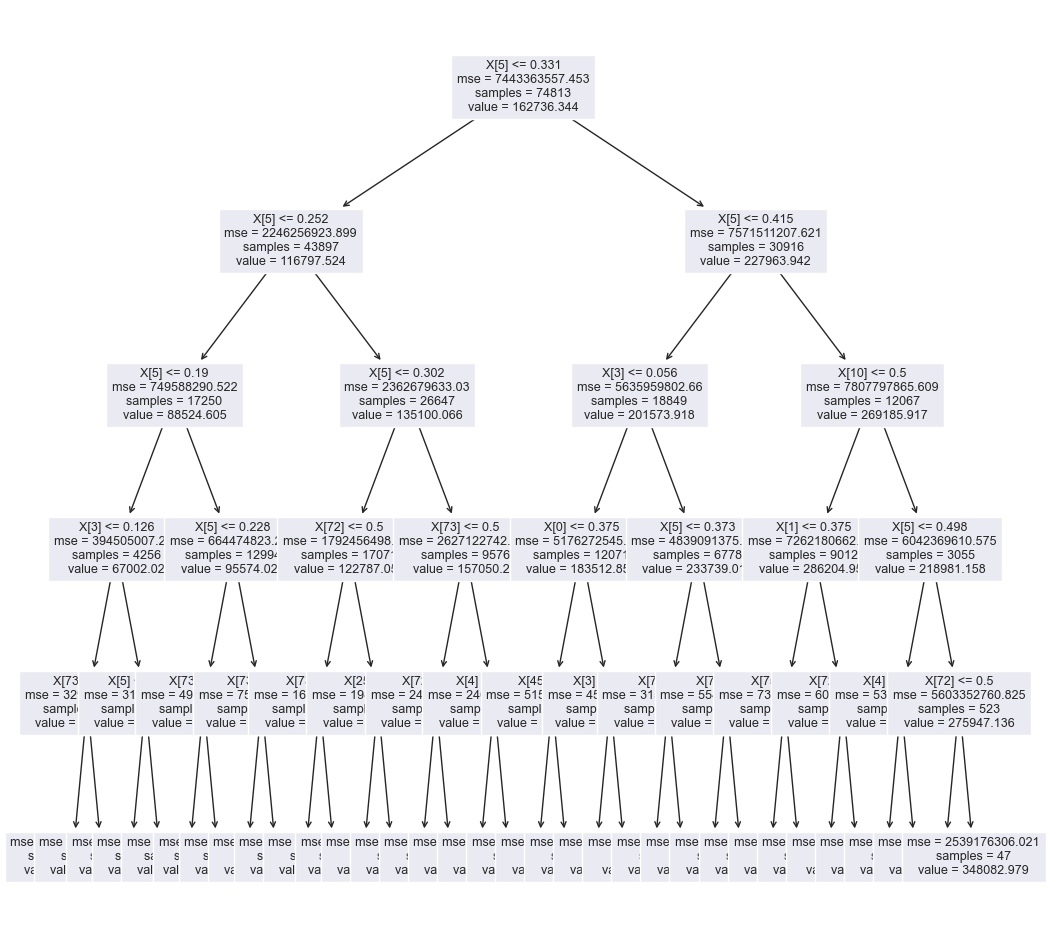

In [68]:
#alternativa 1
lista.append(optim_DT("completo", X_train_num, y_train_num, X_test_num, y_test_num))

C:\Users\igalk\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[0.01380537 0.00775797 0.         0.04310292 0.00397229 0.85948968
 0.         0.01151627 0.         0.         0.02985757 0.
 0.         0.         0.         0.01197501 0.01114213 0.
 0.00738078 0.         0.         0.         0.         0.
 0.         0.        ]


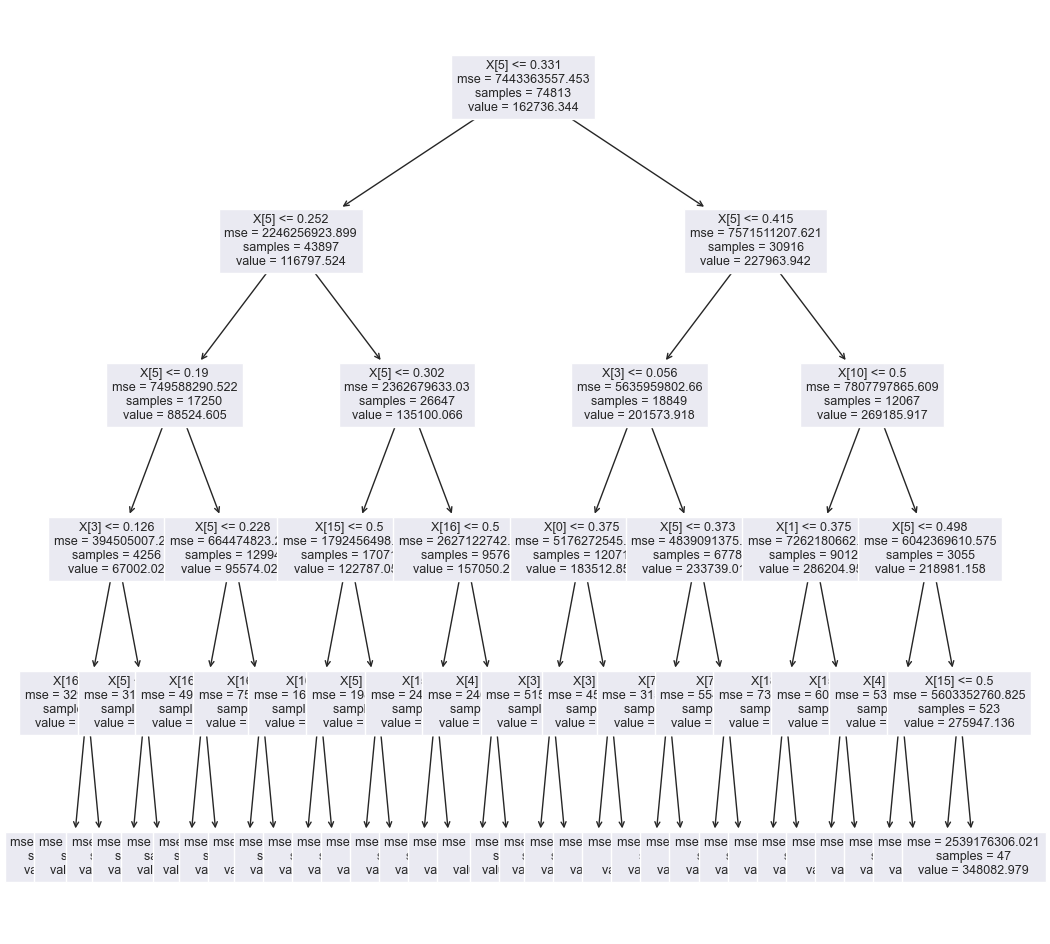

In [69]:
#alternativa 2
lista.append(optim_DT("sin_barrio", X_train_num[X_train_num.columns.drop(lista_barrios)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_barrios)],
                      y_test_num
                      )
             )

C:\Users\igalk\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[0.01388799 0.0121382  0.         0.03992673 0.0037358  0.86466773
 0.         0.01158519 0.         0.         0.03003626 0.
 0.         0.         0.         0.         0.         0.00317306
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00976597 0.         0.         0.         0.
 0.         0.         0.         0.00399622 0.00708686 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


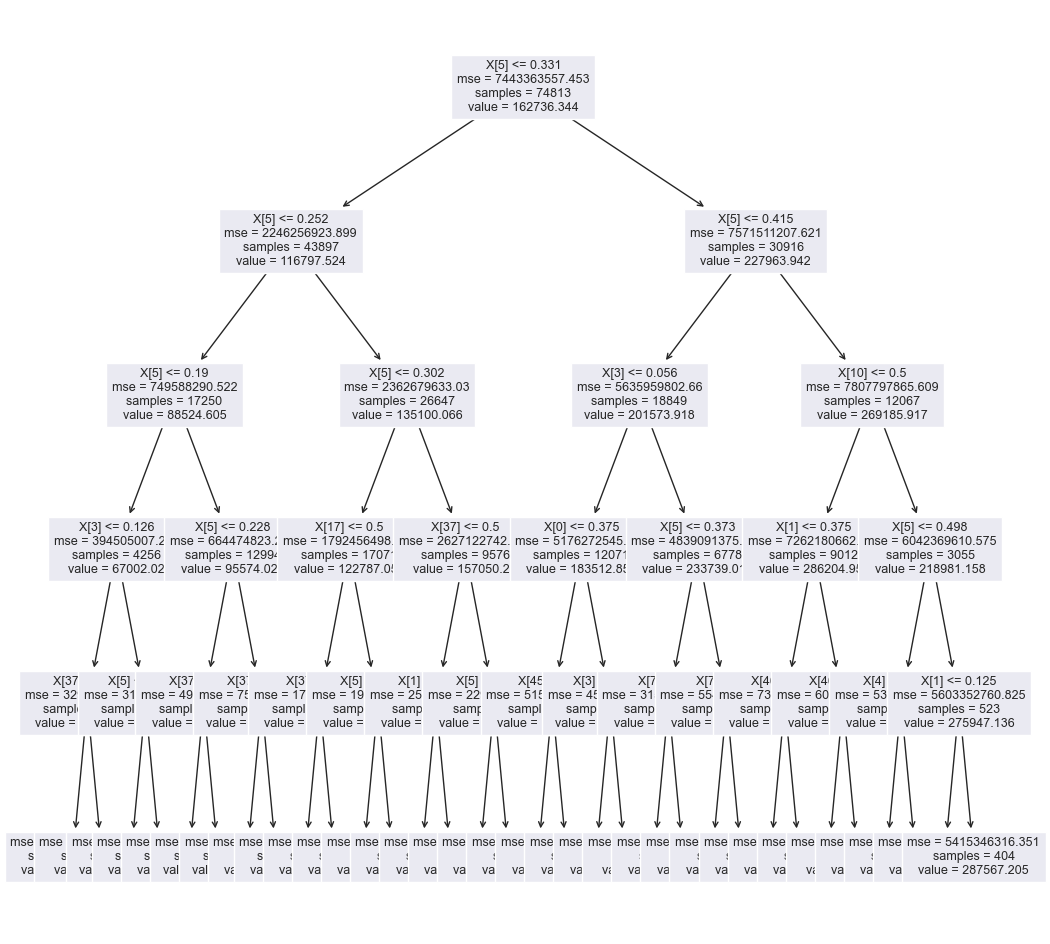

In [70]:
#alternativa 3
lista.append(optim_DT("sin_comuna", X_train_num[X_train_num.columns.drop(lista_comunas)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_comunas)],
                      y_test_num
                      )
             )

C:\Users\igalk\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[1.40197677e-02 1.24645909e-02 2.43597322e-04 4.37723035e-02
 5.73962384e-03 8.78098931e-01 0.00000000e+00 1.53399262e-02
 0.00000000e+00 0.00000000e+00 3.03212593e-02]


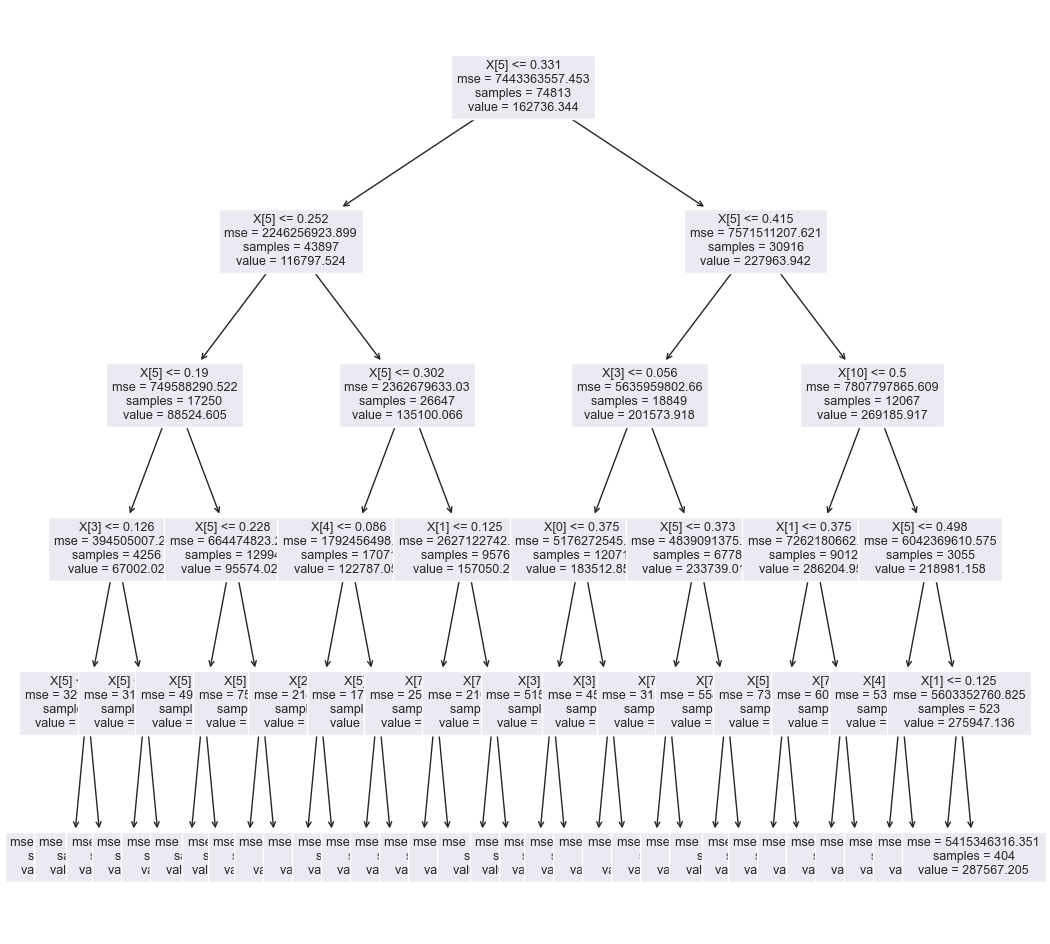

In [71]:
#alternativa 4
lista.append(optim_DT("s_barrio_s_comuna", X_train_num[X_train_num.columns.drop(lista_barrios+lista_comunas)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_barrios+lista_comunas)],
                      y_test_num
                      )
             )

## Optimizacion de Ensambles
### Random Forest

In [72]:
def optim_RF(dataset, X_train_num, y_train_num, X_test_num, y_test_num):
    params = {#"criterion": ["mse", "mae"],
              "max_depth": [None,5],
              "min_samples_split": [2,5],
              "min_samples_leaf": [1,5],
              "bootstrap": [True, False]
              }

    RFR = RandomForestRegressor(max_features=None)

    RFR_cv = RandomizedSearchCV(RFR, param_distributions= params, n_jobs=10, scoring='r2',cv=5, n_iter=10,  random_state=123)

    RFR_cv.fit(X_train_num, y_train_num)
    RFR_cv_best = RFR_cv.best_estimator_

    print(RFR_cv_best.feature_importances_)

    importances = RFR_cv_best.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.bar(range(X_test_num.shape[1]), importances[indices])
    plt.xticks(range(X_test_num.shape[1]), X_test_num.columns, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Importancia')
    plt.title('Importancia de las variables en Random Forest')
    plt.tight_layout()
    plt.show()


    return {'modelo': "RF",
                      "dataset": dataset",
                      'tipo': 'ensambles',
                      'procesamiento': "optimizado",
                      'params': RFR_cv_best.get_params(),
                      'r2_train': RFR_cv_best.score(X_train_num, y_train_num),
                      'r2_test':  RFR_cv_best.score(X_test_num, y_test_num)
                      }

In [73]:
#alternativa 1
lista.append(optim_RF("completo", X_train_num, y_train_num, X_test_num, y_test_num))

#alternativa 2
lista.append(optim_RF("sin_barrio", X_train_num[X_train_num.columns.drop(lista_barrios)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_barrios)],
                      y_test_num
                      )
             )

#alternativa 3
lista.append(optim_RF("sin_comuna", X_train_num[X_train_num.columns.drop(lista_comunas)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_comunas)],
                      y_test_num
                      )
             )
#alternativa 4
lista.append(optim_RF("s_barrio_s_comuna", X_train_num[X_train_num.columns.drop(lista_barrios+lista_comunas)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_barrios+lista_comunas)],
                      y_test_num
                      )
             )

[1.20610049e-02 6.78952144e-03 8.95218118e-03 6.08247654e-02
 3.67444224e-02 6.86292788e-01 9.98230063e-04 1.57360471e-02
 1.15373415e-03 8.86077187e-04 2.36805569e-02 7.28500217e-05
 2.38688029e-05 1.15713360e-03 4.26543686e-04 9.01533666e-04
 6.01840842e-04 1.09341360e-03 2.99416220e-04 2.15143373e-04
 4.01385691e-03 0.00000000e+00 1.97402480e-04 3.30884759e-04
 2.16602540e-04 1.02977990e-03 1.64085082e-04 4.76204637e-04
 1.03237100e-03 4.53810891e-04 1.75250014e-04 6.10624645e-04
 5.32147171e-04 4.76595302e-04 1.10927054e-04 7.02798296e-04
 1.12053344e-04 4.76191438e-03 1.43661155e-04 7.80806390e-06
 2.76532435e-04 7.13818841e-05 1.56590470e-04 3.69216115e-04
 4.35777002e-04 6.83005415e-03 2.27304345e-03 2.64785102e-03
 5.64693183e-04 3.21177461e-04 7.19977955e-04 6.26704761e-04
 1.25786995e-04 2.58901797e-05 1.82369835e-05 1.16206865e-03
 2.41720933e-03 4.84751722e-05 4.32464676e-04 4.34412865e-04
 1.44809229e-04 4.53520651e-04 1.54921057e-05 1.32541226e-06
 4.68542454e-05 7.579938

## XGboost

In [83]:

def optim_XGB(dataset, X_train_num, y_train_num, X_test_num, y_test_num):

    XGB = xgb.XGBRegressor(n_jobs=None) # recomendación de la documentación
                                        #https://xgboost.readthedocs.io/en/latest/python/sklearn_estimator.html#number-of-parallel-threads

    parameters = {'n_estimators':range(20, 200, 5),
                  'max_depth':range(1,7),
                  'learning_rate': [0.01, 0.1, 0.2],

                 }

    xgb_CV = RandomizedSearchCV(XGB, parameters, n_jobs=1, cv=5, random_state=123) #n_jobs=1 recomendación de la documentación

    xgb_CV.fit(X_train_num, y_train_num)
    print(xgb_CV.best_score_, "\n", xgb_CV.best_params_, "\n", xgb_CV.best_estimator_)

    xgb_CV_best= xgb_CV.best_estimator_
    print(xgb_CV_best.feature_importances_)

    importances = xgb_CV_best.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.bar(range(X_test_num.shape[1]), importances[indices])
    plt.xticks(range(X_test_num.shape[1]), X_test_num.columns, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Importancia')
    plt.title('Importancia de las variables en XGBoost')
    plt.tight_layout()
    plt.show()



    return {'modelo': "XGB",
            "dataset": dataset,
            'tipo': 'ensambles',
            'procesamiento': "optimizado",
            'params': xgb_CV_best.get_params(),
            'r2_train': xgb_CV_best.score(X_train_num, y_train_num),
            'r2_test':  xgb_CV_best.score(X_test_num, y_test_num)
            }


0.7482966925253445 
 {'n_estimators': 85, 'max_depth': 6, 'learning_rate': 0.2} 
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=85, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
[9.25934874e-03 1.16827097e-02 1.93684804e-03 6.45506755e-03
 4.26286645e-03 1.32784382e-01 2.23859004e-03 2.08877604e-02
 3.16671678e-03 2.93545215e-03 5.12057692e-02 1.08625146e-03

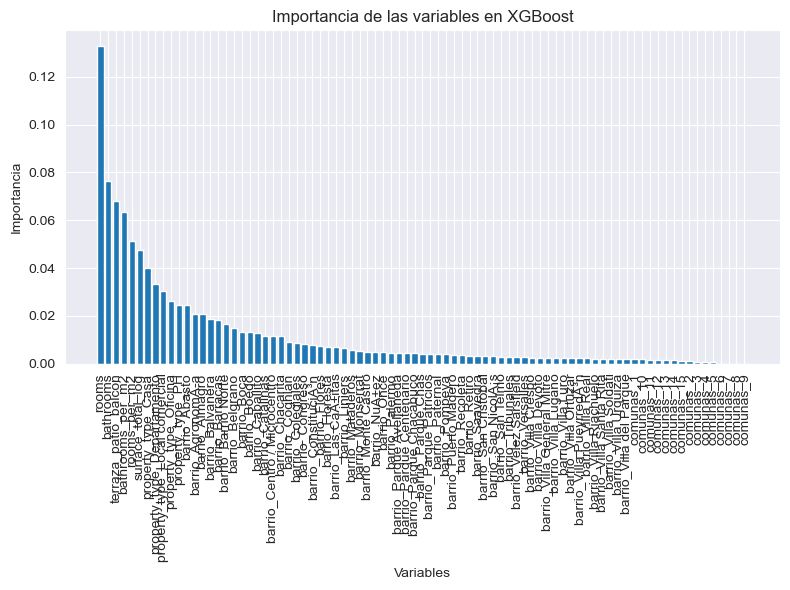

In [84]:
#alternativa 1
lista.append(optim_XGB("completo", X_train_num, y_train_num, X_test_num, y_test_num))




In [79]:
plt.show()

In [75]:

#alternativa 2
lista.append(optim_XGB("sin_barrio", X_train_num[X_train_num.columns.drop(lista_barrios)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_barrios)],
                      y_test_num
                      )
             )

#alternativa 3
lista.append(optim_XGB("sin_comuna", X_train_num[X_train_num.columns.drop(lista_comunas)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_comunas)],
                      y_test_num
                      )
             )
#alternativa 4
lista.append(optim_XGB("s_barrio_s_comuna", X_train_num[X_train_num.columns.drop(lista_barrios+lista_comunas)],
                      y_train_num,
                      X_test_num[ X_train_num.columns.drop(lista_barrios+lista_comunas)],
                      y_test_num
                      )
             )

0.7482966925253445 
 {'n_estimators': 85, 'max_depth': 6, 'learning_rate': 0.2} 
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=85, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
[9.25934874e-03 1.16827097e-02 1.93684804e-03 6.45506755e-03
 4.26286645e-03 1.32784382e-01 2.23859004e-03 2.08877604e-02
 3.16671678e-03 2.93545215e-03 5.12057692e-02 1.08625146e-03

In [76]:
alltogether_regresion = pd.DataFrame(lista)
alltogether_regresion['gap>0.05'] = np.where(alltogether_regresion.r2_train-alltogether_regresion.r2_test>0.05, 'Sobreajustado', '')
alltogether_regresion.sort_values('r2_test', ascending= False).reset_index(inplace=True)
display(alltogether_regresion)

,modelo,dataset,tipo,procesamiento,params,r2_train,r2_test,tiempo,gap>0.05
0,Dummy,completo,clasicos,benchmark,"{'constant': None, 'quantile': None, 'strategy...",-0.044857,-0.047796,0.00,
1,RL,completo,clasicos,benchmark,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.440271,0.461148,0.52,
2,KNN,completo,clasicos,benchmark,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.641412,0.453393,0.01,Sobreajustado
3,DT,completo,arboles,benchmark,"{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_de...",0.904336,0.440325,NaN,Sobreajustado
4,RF,completo,ensambles,benchmark,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.871533,0.592569,NaN,Sobreajustado
5,GB,completo,ensambles,benchmark,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.713483,0.590772,NaN,Sobreajustado
6,XGB,completo,ensambles,benchmark,"{'objective': 'reg:squarederror', 'base_score'...",0.853208,0.602901,NaN,Sobreajustado
7,Dummy,sin_barrio,clasicos,benchmark,"{'constant': None, 'quantile': None, 'strategy...",-0.044857,-0.047796,0.00,
8,RL,sin_barrio,clasicos,benchmark,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.424817,0.439272,0.07,
9,Lasso,completo,clasicos,optimización,9.310414,0.440258,0.461366,0.07,


In [77]:
alltogether_regresion.to_csv("salida_regresion.csv", index=False)

# Resultados

Aquí vamos a contestar la pregunta ¿Cuáles fueron los hallazgos?

**Implemente modelos cásicos para Regresión y Clasificación**




In [ ]:
# Para Clasificacion podría usar: KNN, SVM, NB 
# Para Regresión podría usar: KNN, SVM, RL

**Implemente modelos basados en árboles para Regresión y Clasificación**


In [ ]:
# Para Clasificacion y Regresión podría usar RF

**Ejemplo para un modelo de árboles y Clasificación**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import numpy as np

params_grid = {'criterion':['gini','entropy'],
               'max_depth':list(range(1,30)),
               'min_samples_leaf':list(range(1000,5000)),         
               'ccp_alpha':np.linspace(0,0.5,100)}


kfoldcv = StratifiedKFold(n_splits=5)
base_tree = DecisionTreeClassifier()
scorer_fn = make_scorer(f1_score, average = 'macro')
randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=500)
randomcv.fit(X_train_cat, y_train_cat);

In [ ]:
# pd.DataFrame(randomcv.cv_results_)

In [ ]:
randomcv.best_params_

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = randomcv.best_estimator_
y_pred = best_model.predict(X_test_cat)

print(classification_report(y_test_cat, y_pred ) )

In [ ]:
cm = confusion_matrix(y_test_cat, y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
best_model.feature_importances_

In [ ]:
"""features = [
 'property_type',
 'rooms',
 'surface_total',
 'terraza_patio_balcon',
 'l3',
 'comunas',
'bathrooms']"""

In [ ]:
pd.Series(best_model.feature_importances_.ravel()).hist()

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["0","1","2"], yticklabels=["0","1","2"], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show(block=False)

# Discusión

Aquí vamos a contestar la pregunta ¿Qué significan esos resultados?

Máximo 1 carilla, apoyado en la bibliografía que citamos en la introducción.  En el primer párrafo resumimos nuestros resultados relacionados a nuestra pregunta. Luego cada párrafo une los baches que planteamos en la introducción con un sub-tema de nuestros resultados. Aquí sí comparamos y discutimos las diferentes performance de cada modelo. Debemos señalar resultados importantes, indicar cuándo nuestros resultados coinciden o no con la bibliografía, explicar las consecuencias teóricas de nuestros resultados y sus posibles aplicaciones prácticas y resumir las pruebas que respaldan las conclusiones. Hay que señalar el aporte más importante y fundamentar a qué se debe ese resultado. Debemos incluir las limitaciones que tiene nuestro estudio.

In [ ]:
## Comparacion entre modelos. Cual elegiría? Justifique

# Conclusión

Nunca más que un párrafo del tipo ‘En base a nuestros resultados podemos concluir que x modelo permite resolver fielmente la tarea objetivo T en base a datos E’.